In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from datetime import timedelta
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('emails.csv (4).zip')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
#df.get_value(58,'text')

In [5]:
df.shape

(5728, 2)

In [6]:
df.value_counts('spam')

spam
0    4360
1    1368
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(5695, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


In [10]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
df.groupby('spam').count()

,text
spam,
0,4327
1,1368


In [12]:
df.value_counts('spam')

spam
0    4327
1    1368
dtype: int64

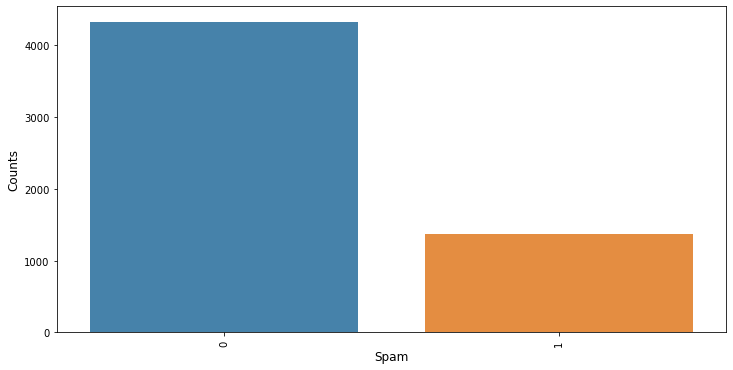

In [13]:
label_counts = df.spam.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [14]:
x=df.text.values

In [15]:
x

array(["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : y

In [16]:
y = df.spam.values

In [17]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=101)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()

In [22]:
xtrain = cv.fit_transform(x_train)

In [23]:
xtrain.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB()

In [26]:
mnb.fit(xtrain,y_train)

MultinomialNB()

In [27]:
xtest = cv.transform(x_test)

In [28]:
xtest.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
mnb.score(xtest,y_test)

0.9894675248683441

In [30]:
emails = ['hey I am looking for machine learning tutorial banguli languages', 'hey you win a free iphone please do the survay']

In [31]:
cv_emails = cv.transform(emails)

In [32]:
mnb.predict(cv_emails)

array([0, 1], dtype=int64)